In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A. 학습모듈 기록 Part

+ Record 모듈 import
+ Record 객체 생성
+ 학습 기록 추가

In [94]:
!pip install tinydb

You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 1. 모듈 import

In [88]:
from recorder import Recorder

## 2. 객체 생성

+ 공통 json 파일 위치 지정
+ metric 지정

In [86]:
# 공통 JSON 파일은 AIDU의 경우 AICentro 데이터 관리항목에 두고 모델러가 함께 사용
# 대표할 메트릭은 대회 상황에 맞게 정하면됨(best 추출 기준)
rec = Recorder('history.json', metric='accuracy')

## 3. 레코드 추가

+ validation 실행 이후에 추가
+ 실험 1건 당 1개의 레코드 추가하는 것이 적절
+ 자동 기록 항목
    - uuid, datetime
+ 사용자 정의 기록 항목
    - 예) features, n_features_in, accuracy, auc 등
    - 예) user, elapsed_time, model, hyperparameters

In [87]:
# DB Insert 항목은 대회 상황에 맞게 정하면 됨
# 추가할 레코드별로 딕셔너리 항목이 상이하더라도 큰 문제는 없음
rec.insert({'features': ['age', 'sex', 'inet_amt'], 'n_features_in': 3, 
            'accuracy': 0.92424, 
            'tag': 'feature_200',
            'user': 'Trumph',
            'elapsed_time': 0.0712,
            'model': 'xgboost',
            'hyper_parameters': {'max_depth':6, 'min_child_weight': 1,'eta':.3,}})

# B. 별도 기록 확인 Part

+ Record 객체 생성 필요

## 4. 기록 확인

+ 개인별로 기록을 확인하는 노트북을 별도로 작성해서 수시로 확인 가능
+ 팀 대쉬보드로 활용 가능
+ 기록 확인 함수 : pandas DataFrame으로 반환
    - get_best(n=조회할 기록수)
    - get_recent(n=조회할 기록수, reverse=역순옵션)

In [59]:
rec.get_best(n=3)

,features,n_features_in,accuracy,tag,user,elapsed_time,model,hyper_parameters,uid,datetime
4,"[age, sex, inet_amt]",3,0.92124,feature_200,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",9e7b2348-93f8-4933-85ca-519738d7bf35,2020-10-29 11:50:18
5,"[age, sex, inet_amt]",3,0.92124,feature_200,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",0690d158-940d-4c5f-86a4-d7984c48fcb4,2020-10-29 12:51:48
2,"[age, sex, inet_amt, year, weekday]",5,0.89924,feature_103,Trumph,0.0812,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4305333d-9fd0-4bac-8c75-97b51470e794,2020-10-29 11:46:00


In [60]:
rec.get_recent(n=10)

,features,n_features_in,accuracy,tag,user,elapsed_time,model,hyper_parameters,uid,datetime
5,"[age, sex, inet_amt]",3,0.92124,feature_200,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",0690d158-940d-4c5f-86a4-d7984c48fcb4,2020-10-29 12:51:48
4,"[age, sex, inet_amt]",3,0.92124,feature_200,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",9e7b2348-93f8-4933-85ca-519738d7bf35,2020-10-29 11:50:18
3,"[age, sex, inet_amt]",3,0.86124,feature_104,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",ce036151-f51c-435d-bcbb-fb87f2147d97,2020-10-29 11:46:28
2,"[age, sex, inet_amt, year, weekday]",5,0.89924,feature_103,Trumph,0.0812,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4305333d-9fd0-4bac-8c75-97b51470e794,2020-10-29 11:46:00
1,"[age, sex, inet_amt]",3,0.87224,feature_101,Melanija,0.1312,catboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4df8ff20-17f7-4b7f-88a2-13873ed31dbb,2020-10-29 11:44:55
0,"[age, sex, inet_amt]",3,0.87124,feature_101,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",66bee151-e13a-4d02-a2ef-a96c100f0432,2020-10-29 11:41:53


+ get_recent, get_best를 pandas DataFrame으로 받아서 query, plot 함수로 차트 구성 가능할 것

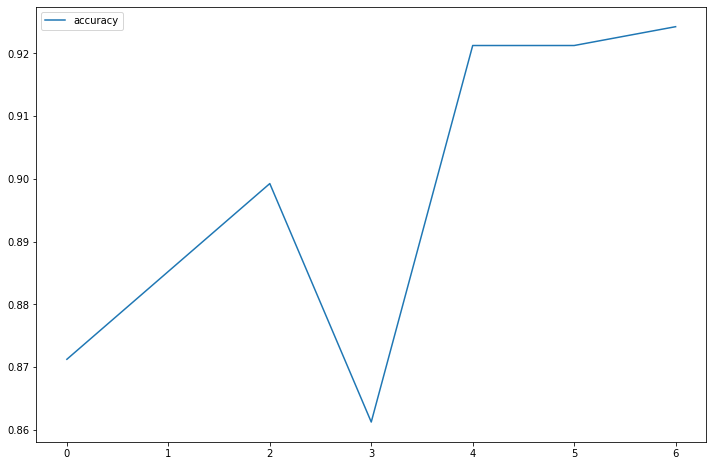

In [68]:
(rec.get_recent(n=10, reverse=True)
 .query('user == "Trumph" and model == "xgboost"')
 .assign()
 .plot(kind='line', y='accuracy', figsize=(12,8)));

## 5. 텍스트 검색

In [82]:
rec.query(key='user', value='Melanija')

,features,n_features_in,accuracy,tag,user,elapsed_time,model,hyper_parameters,uid,datetime
1,"[age, sex, inet_amt]",3,0.87224,feature_101,Melanija,0.1312,catboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4df8ff20-17f7-4b7f-88a2-13873ed31dbb,2020-10-29 11:44:55


In [83]:
rec.query(key='tag', value='101')

,features,n_features_in,accuracy,tag,user,elapsed_time,model,hyper_parameters,uid,datetime
0,"[age, sex, inet_amt]",3,0.87124,feature_101,Trumph,0.0712,xgboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",66bee151-e13a-4d02-a2ef-a96c100f0432,2020-10-29 11:41:53
1,"[age, sex, inet_amt]",3,0.87224,feature_101,Melanija,0.1312,catboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4df8ff20-17f7-4b7f-88a2-13873ed31dbb,2020-10-29 11:44:55


In [84]:
rec.query(key='model', value='catboost')

,features,n_features_in,accuracy,tag,user,elapsed_time,model,hyper_parameters,uid,datetime
1,"[age, sex, inet_amt]",3,0.87224,feature_101,Melanija,0.1312,catboost,"{'max_depth': 6, 'min_child_weight': 1, 'eta':...",4df8ff20-17f7-4b7f-88a2-13873ed31dbb,2020-10-29 11:44:55
